In [25]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys
import pandas as pd
from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [26]:
env = BlackjackEnv()

In [27]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """


# FIRST VISIT MC PREDICTION
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.

    # dictionaries with values of float
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    # [1,num_episodes+1) not include the right end
    for epi in (1,num_episodes+1):
        if epi % 1000 == 0:
            print("\rEpisode {}/{}.".format(epi, num_episodes))
            sys.stdout.flush()
        # generating an episode following policy π
        # An episode is an array of (state, action, reward) tuples
        episode = []
        # our observation (score, dealer_score, useable_Ace) is representation of our current state
        state = env.reset()

        # loop for 100 time step
        for time in range(100):
            # map a state to an action
            action = policy(state)

            # step function returns observation, reward, done
            next_state, reward, done, _ = env.step(action)

            # append the tuple to episode
            episode.append((state,reward,action))

            # check to see if this episode terminate
            if done:
                break
            state = next_state

        # Find all states the we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        # return set that contains first element of each episode --- all states
        # set is an unordered collection of distinct elements

        states_in_episode = set([tuple(x[0]) for x in episode])

        # iterate through each first visit of state

        for state in states_in_episode:
            # The next() function returns the next item in an iterator.

            # i is the index, x is the (state,action,reward) tuple
            first_occurence_idx = next(i for i, x in enumerate(episode) if x[0] == state)

            # Sum up all rewards since the first occurance

            # x[2] is the reward, multiplied by discounted factor
            # add up all the discounted reward from the first occurance of the episode
            G = sum([x[2] * (discount_factor ** i) for i, x in enumerate(episode[first_occurence_idx:])])

            # Calculate average return for this state over all sampled episodes
            returns_sum[state] += G
            returns_count[state] += 1.0

            V[state] = returns_sum[state] / returns_count[state]


    return V    

In [28]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

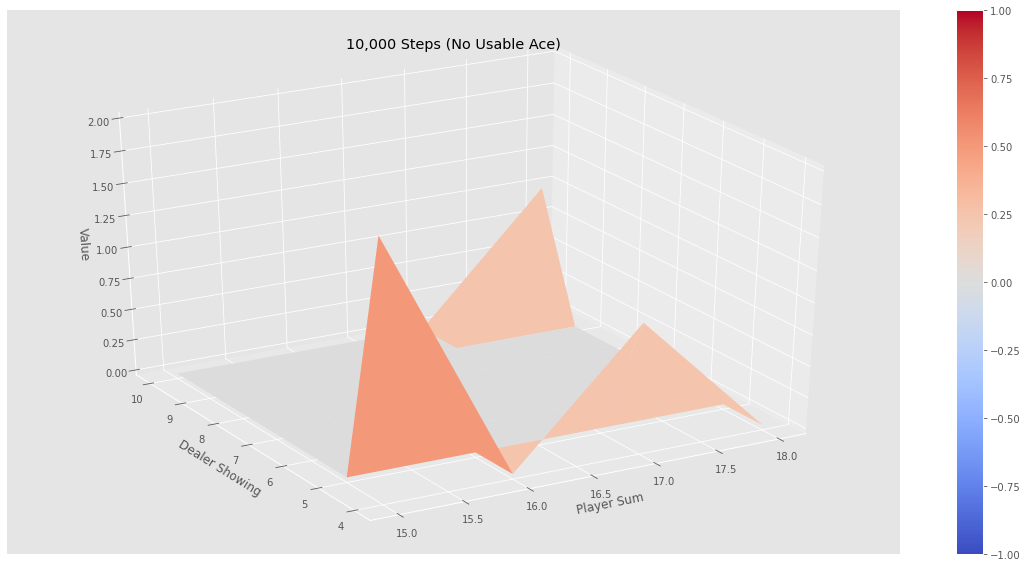

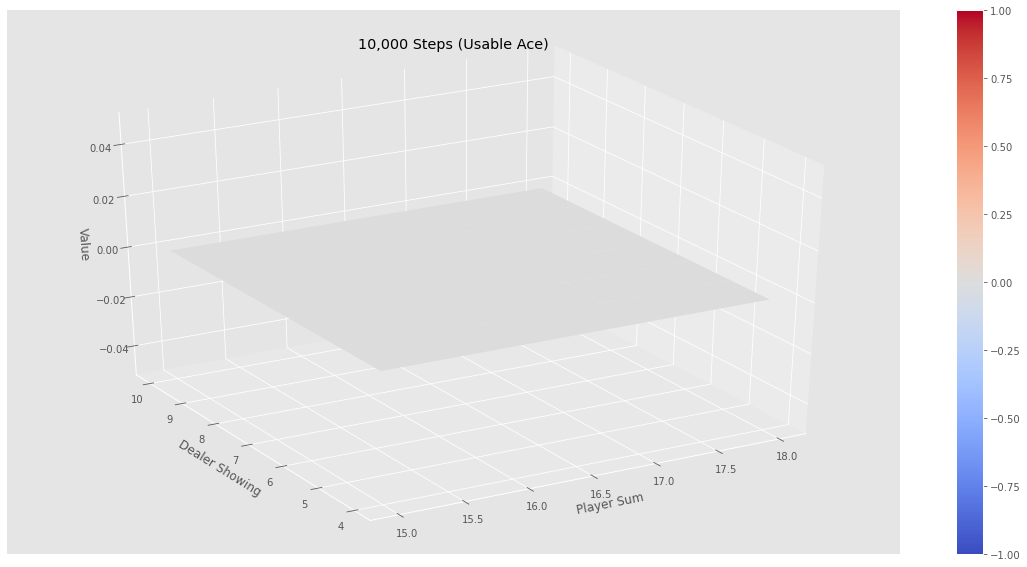

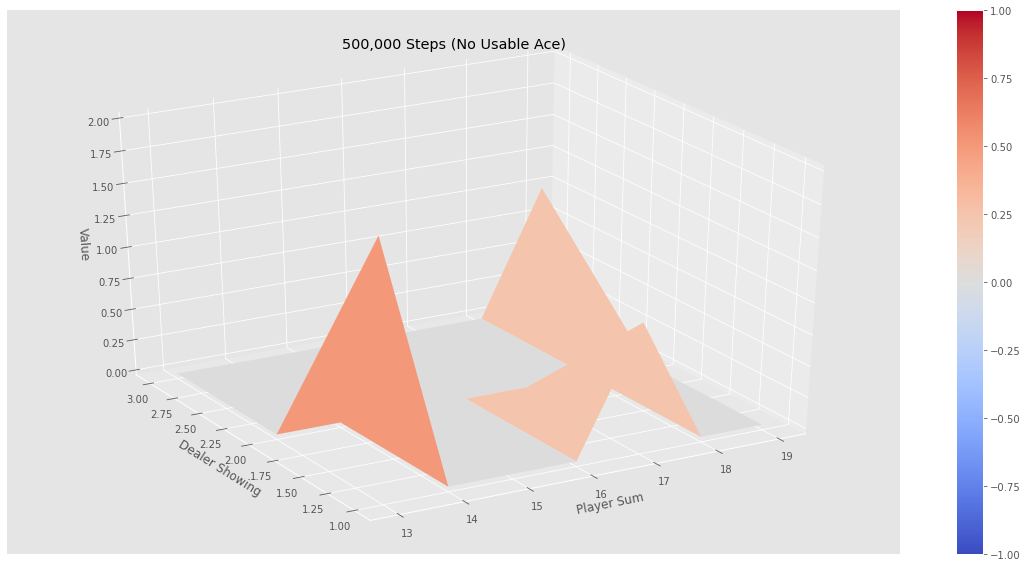

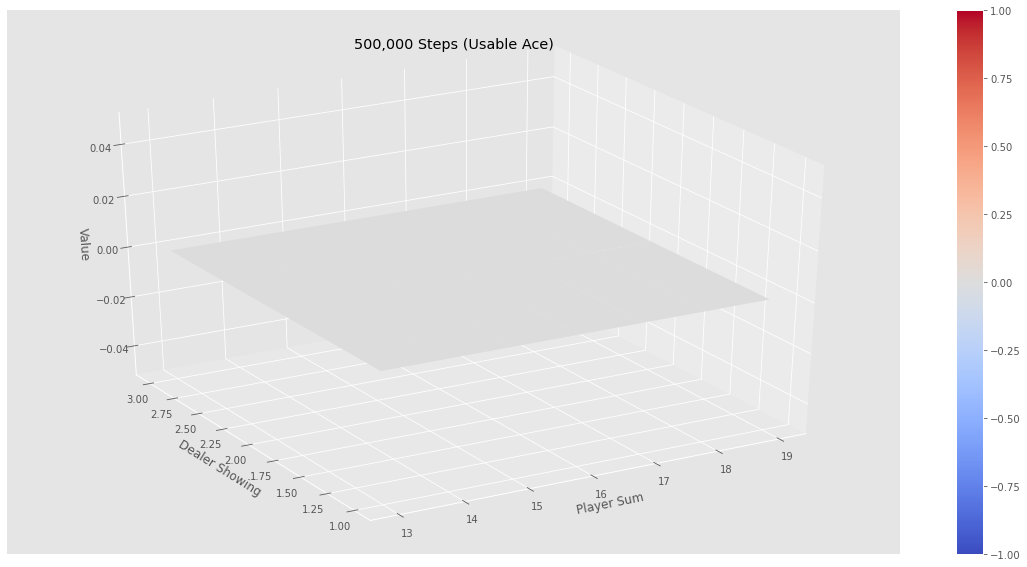

In [29]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")